#**DBSCAN**


#Step 1 : Import Libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [15]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.50, random_state=0)
X

array([[ 2.34452827,  1.07249089],
       [ 3.20722587,  0.36765575],
       [ 0.99914934,  4.2101954 ],
       [ 0.39817886,  4.69438638],
       [ 1.4020041 ,  1.726729  ],
       [-1.57209502,  3.60168088],
       [-0.52127567,  2.89558455],
       [ 0.78260667,  4.15263595],
       [ 1.29633584,  3.49530931],
       [-1.13422911,  7.93619999],
       [-1.85693217,  3.00579174],
       [ 1.796508  ,  0.40824873],
       [-1.14055659,  2.08708312],
       [-1.02773932,  7.92485645],
       [ 1.45098048,  4.34756295],
       [ 1.12538917,  4.96698028],
       [ 2.48974926,  1.03609961],
       [ 0.82049381,  4.33187   ],
       [-1.67241604,  7.67262528],
       [ 1.00952869,  4.45502328],
       [ 0.45914866,  4.64458459],
       [ 2.58952222,  0.67097076],
       [-1.71447757,  2.30478417],
       [-1.62310095,  7.85186439],
       [ 1.05452335,  4.41987785],
       [-1.13455939,  7.32709069],
       [ 1.87855165,  0.08942657],
       [-1.41714924,  3.11441373],
       [-0.54758336,

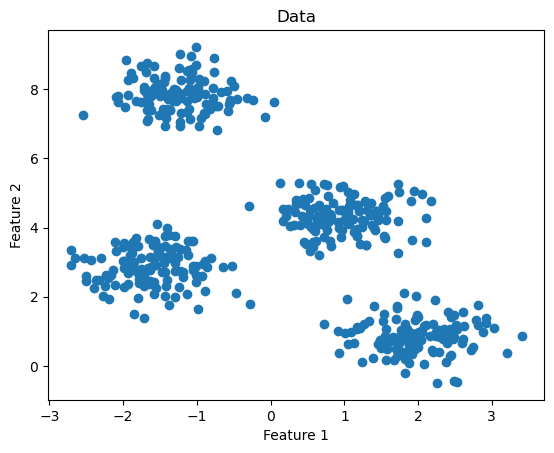

In [16]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data')
plt.show()

#Step 3 : Modeling The Data Using DBSCAN



['y', 'b', 'g', 'r']


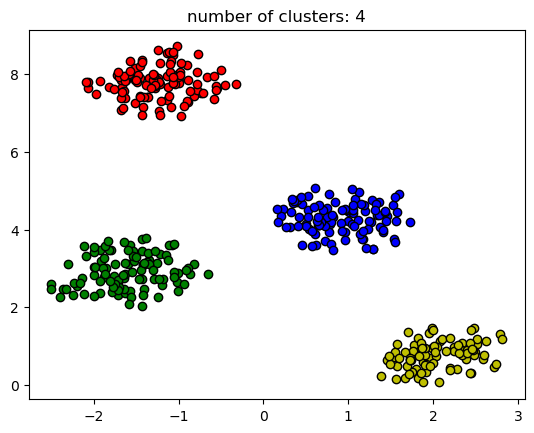

In [19]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [20]:
# evaluation metrics
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels) # Import adjusted_rand_score
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.50
Adjusted Rand Index: 0.70


#**Well Done :)**